Title: Linear Least Square for Classification
Author: Thomas Breuel
Institution: UniKL

In [1]:


import scipy,pylab,numpy
from numpy import *
from scipy import *
from pylab import *
from urllib import urlopen
from gzip import GzipFile
from scipy.spatial import distance
from scipy.spatial.distance import cdist

# Linear Classification Problem

We generate a linear classification problem as before.

462 538


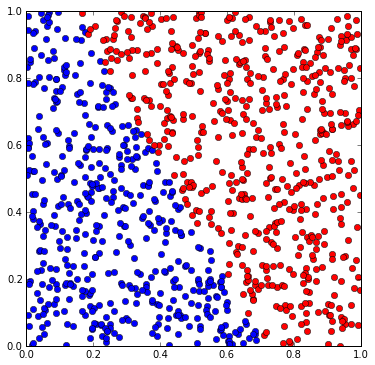

In [27]:
data = random_sample((1000,2))
labels = (data[:,0]*0.7+data[:,1]*0.4>0.5)
d0 = data[labels==False]
d1 = data[labels]
figure(figsize=(6,6)); xlim((0,1)); ylim((0,1))
plot(d0[:,0],d0[:,1],"bo")
plot(d1[:,0],d1[:,1],"ro")
print len(d0),len(d1)

As before, we *augment* the vectors to get rid of the inhomogeneous part.



In [28]:
augmented = concatenate([ones((len(data),1)),data],axis=1)
augmented[:3,:]

array([[ 1.        ,  0.42522476,  0.59810121],
       [ 1.        ,  0.84024842,  0.32446468],
       [ 1.        ,  0.56822772,  0.14964073]])

It's convenient to use labels of (-1,1) instead of (0,1); that way, the weight vector we get out of least squares is comparable to the weight vector we're getting out of the perceptron learning algorithm.

In [29]:
labels = 2.0*labels-1.0

Least Square Solution
====================

We now want to find a vector $a$ such that $a \cdot x_i \approx c_i$ for all $i$.

We can write this as a matrix and vector equation if we put the measurements into the rows of  a matrix $X = {x_1\choose x_N}$ and $c = {c_1\choose c_N}$

$$X \cdot a^T =  c$$

In order to solve this, we take the pseudo-inverse of $X$:

$$a^T = X^\dagger \cdot c$$

The pseudo-inverse is a generalization of the inverse matrix for non-rectangular and/or non-full-rank matrices.

In [30]:
# finding weight vector via pseudo-inverse
a = dot(linalg.pinv(augmented),labels)
d,a0,a1 = a
print d,a0,a1

-1.77885119767 2.56752899504 1.21394209977


462 538


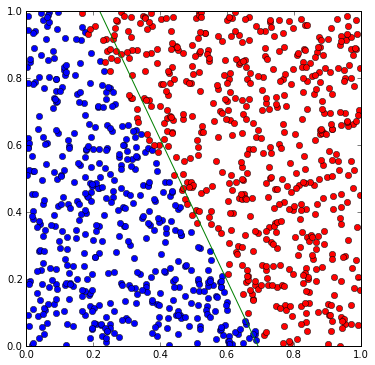

In [32]:
# plotting the decision boundary
d0 = data[labels<=0]
d1 = data[labels>0]
figure(figsize=(6,6)); xlim((0,1)); ylim((0,1))
plot(d0[:,0],d0[:,1],"bo")
plot(d1[:,0],d1[:,1],"ro")
plot([0,-d/a0],[-d/a1,0],"g")
savefig("tmp.png")
print len(d0),len(d1)

We can see that a _linear least square regression_ of the class label against the measurement $x$ seems to give a reasonable linear classifier.

However, we have no justification for this approach yet, and it is a rather odd thing to do. 

Let's look at this in 1D.

# 1D Example

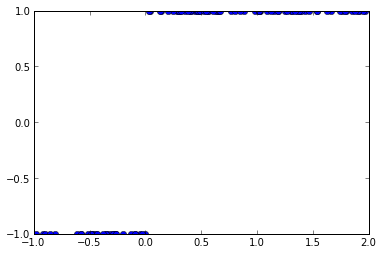

In [33]:
# 1D linearly separable problem
xs = 3*rand(100)-1.0
ys = 2.0*(xs>0.0)-1
plot(xs,ys,'o')

In [34]:
# augmented vector
augmented = concatenate([ones((len(xs),1)),xs.reshape(len(xs),1)],axis=1)
augmented[:3,:]

array([[ 1.        ,  0.64681064],
       [ 1.        ,  0.6521371 ],
       [ 1.        ,  1.76076101]])

In [35]:
# weight vector via pseudo-inverse
w = dot(linalg.pinv(augmented),ys)
d,a = w
print d,a

-0.108646145094 0.913297689912


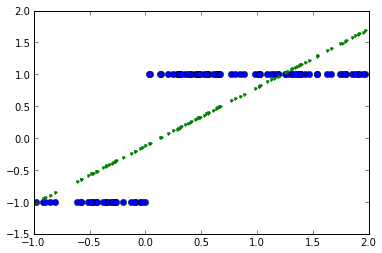

In [37]:
# plotting linear predictor vs class label
plot(xs,ys,'o')
plot(xs,[dot(w,[1,x]) for x in xs],'.')



Note:

- even though the data points are fully linearly separable, the least square solution didn't find the decision boundary perfectly
- the prediction of the class label (a linear function) is rather poorly related to the actual class label (a step function)